# Introduction to deep learning for computer vision

## Introduction to convnets

**Instantiating a small convnet**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1)) # 컨브넷 입력 텐서 :(image_height, image_width, image_channels)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [4]:
model.summary() # 컨브넷 구조

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

 컨브넷 입력 텐서 :(image_height, image_width, image_channels)  
 컨브넷, 맥스풀링 층 출력은 입력 층과 같이 3d tensor이다.  
 높이와 너비 차원은 네트워크가 깊어질 수록 작아지는 경향이 있음  
 Dense층(완전 연결 네트워크)는 1D 벡터 처리 -> 3D 출력을 1D 텐서로 펼쳐야 함 

**Training the convnet on MNIST images**

In [8]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 10s 10ms/step - loss: 0.0150 - accuracy: 0.9955
Epoch 2/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0127 - accuracy: 0.9962
Epoch 3/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0096 - accuracy: 0.9971
Epoch 4/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0083 - accuracy: 0.9975
Epoch 5/5
938/938 [==============================] - 8s 9ms/step - loss: 0.0071 - accuracy: 0.9978


**Evaluating the convnet**

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0380 - accuracy: 0.9914
Test accuracy: 0.991


### The convolution operation

- 합성곱 연산으로 학습된 패턴은 평행 이동 불변성을 가짐(translation invariant)  
- 컨브넷은 패턴의 공간적 계층 구조를 학습할 수 있음

#### Understanding border effects and padding

padding :  image 주위를 0으로 둘러주는 과정을 말한다.

#### Understanding convolution strides

### The max-pooling operation

합성곱 연산을 수행하기 전에 입력 데이터 주변에 특정 값을 채우는 것을 패딩(padding)이라고 합니다.  
-> 주로 출력 크기를 조정할 목적으로 사용   
스트라이드 : 필터를 적용하는 위치의 간격

**An incorrectly structured convnet missing its max-pooling layers**

In [10]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

In [12]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yoonhanse","key":"3f017a293173dc2509f8acb74aa02bac"}'}

In [13]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [14]:
!kaggle competitions download -c dogs-vs-cats

 97% 791M/812M [00:03<00:00, 180MB/s]
100% 812M/812M [00:04<00:00, 208MB/s]


In [15]:
!unzip -qq dogs-vs-cats.zip

In [16]:
!unzip -qq train.zip

**Copying images to training, validation, and test directories**

In [17]:
import os, shutil, pathlib

original_dir = pathlib.Path("train") # train 디렉토리 경로를 original_dir에 저장
new_base_dir = pathlib.Path("cats_vs_dogs_small") # cats_vs_dogs_small 디렉토리 경로를 new_base_dir에 저장

In [18]:
# cat and dog 이미지를 new_base_dir/subsetname/category 하위 디렉토리로 복사하는 함수  
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir) # 폴더 생성
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

In [19]:
make_subset("train", start_index=0, end_index=1000) # 1000개를 training set에 
make_subset("validation", start_index=1000, end_index=1500) # 500개를 validation set에
make_subset("test", start_index=1500, end_index=2500) # 1000개를 test set에 

### Building the model 

**Instantiating a small convnet for dogs vs. cats classification**

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs) # 모든 이미지를 1/255로 스케일을 조정
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [21]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**Configuring the model for training**

In [22]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [23]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)
# 모든 이미지의 크기를 180*180으로 바꾼다

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [24]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [25]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [26]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [27]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break
  
# shape (16,) dataset을 shape(4,4)로 변환

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [28]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


180*180의 RGB이미지, 각 배치마다 32 sample

**Fitting the model using a `Dataset`**

In [29]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
] # 콜백 추가 -> val loss 가 작을 때 갱신, 새 파일만 저장
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 11s 128ms/step - loss: 0.7281 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5010
Epoch 2/30
63/63 [==============================] - 7s 112ms/step - loss: 0.6976 - accuracy: 0.5290 - val_loss: 0.6994 - val_accuracy: 0.5020
Epoch 3/30
63/63 [==============================] - 7s 113ms/step - loss: 0.6811 - accuracy: 0.5965 - val_loss: 0.6466 - val_accuracy: 0.6210
Epoch 4/30
63/63 [==============================] - 8s 115ms/step - loss: 0.6496 - accuracy: 0.6470 - val_loss: 0.6142 - val_accuracy: 0.6480
Epoch 5/30
63/63 [==============================] - 7s 114ms/step - loss: 0.5977 - accuracy: 0.7020 - val_loss: 0.5742 - val_accuracy: 0.7110
Epoch 6/30
63/63 [==============================] - 8s 114ms/step - loss: 0.5379 - accuracy: 0.7265 - val_loss: 0.6181 - val_accuracy: 0.6830
Epoch 7/30
63/63 [==============================] - 9s 126ms/step - loss: 0.4900 - accuracy: 0.7605 - val_loss: 0.6881 - val_accuracy: 0.6870
Epoch

**Displaying curves of loss and accuracy during training**

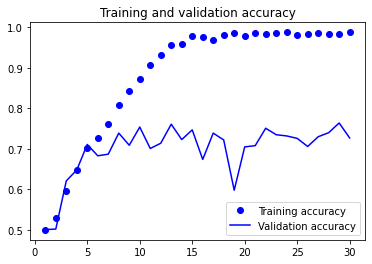

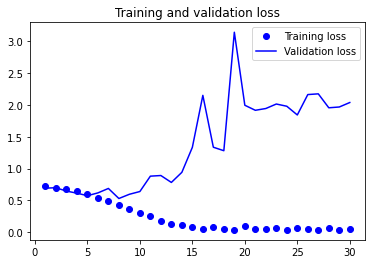

In [30]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

validation accuracy 75%   
epoch 10 이후 -> overfitting 의 문제 나타남

**Evaluating the model on the test set**

In [31]:
test_model = keras.models.load_model("convnet_from_scratch.keras") # 모델을 다시 로드하여 과적합 전 상태에서 정확도 평가 
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 53ms/step - loss: 0.5689 - accuracy: 0.7200
Test accuracy: 0.720


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [32]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"), # 사진 뒤집기
        layers.RandomRotation(0.1), # 사진 회전
        layers.RandomZoom(0.2), # 사진 확대
    ]
)

**Displaying some randomly augmented training images**

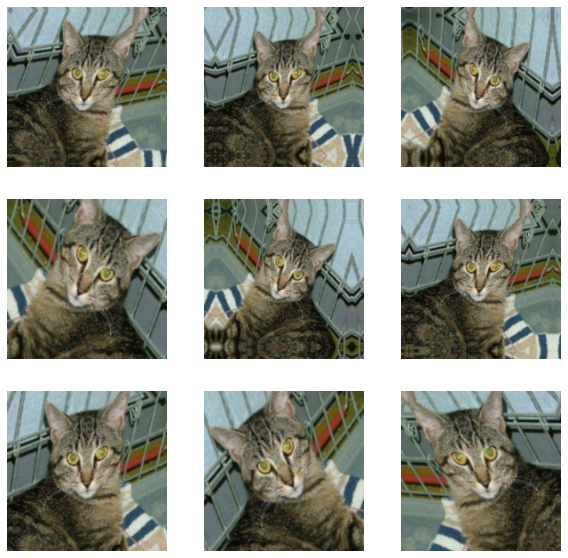

In [33]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1): 
    for i in range(9):
        augmented_images = data_augmentation(images) # data augmentation 적용 
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [34]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs) # apply data augmentation
x = layers.Rescaling(1./255)(x) # scaling
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x) # dropout도 추가! 
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [35]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 10s 124ms/step - loss: 0.7429 - accuracy: 0.4950 - val_loss: 0.6921 - val_accuracy: 0.5410
Epoch 2/100
63/63 [==============================] - 8s 121ms/step - loss: 0.7037 - accuracy: 0.5455 - val_loss: 0.6833 - val_accuracy: 0.5040
Epoch 3/100
63/63 [==============================] - 8s 121ms/step - loss: 0.6910 - accuracy: 0.5585 - val_loss: 0.6856 - val_accuracy: 0.5900
Epoch 4/100
63/63 [==============================] - 8s 122ms/step - loss: 0.6827 - accuracy: 0.5760 - val_loss: 0.6762 - val_accuracy: 0.6250
Epoch 5/100
63/63 [==============================] - 8s 122ms/step - loss: 0.6640 - accuracy: 0.6295 - val_loss: 0.6333 - val_accuracy: 0.6400
Epoch 6/100
63/63 [==============================] - 8s 121ms/step - loss: 0.6507 - accuracy: 0.6350 - val_loss: 0.6267 - val_accuracy: 0.6470
Epoch 7/100
63/63 [==============================] - 8s 121ms/step - loss: 0.6229 - accuracy: 0.6690 - val_loss: 0.6165 - val_accuracy: 0.663

**Evaluating the model on the test set**

In [36]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 4s 52ms/step - loss: 0.4367 - accuracy: 0.8260
Test accuracy: 0.826


## Leveraging a pretrained model

small data set 에 대해 사전 훈련된 모델(이전에 대규모 dataset으로부터 학습되어 저장된 네트워크)을 사용하는 것이 효과적이다.  

Pretrained model을 사용하는 두 가지 방법 
- feature extraction
- pretrained model  

### Feature extraction with a pretrained model

이전에 훈련된 모델을 사용해 새로운 sample에서 흥미로운 특징을 추출한다.   
이러한 기능들이 처음부터 훈련된 새로운 분류기를 통해 구현된다 
이미지 분류기에 사용되는 커넥터는 convolutional base와 densely connected classifier로 나뉨
- 분류기에서 more generic 하고 reuseable 한 부분 -> convolution base
- 일반적으로 densely connected classifier는 재사용하지 않음

**Instantiating the VGG16 convolutional base**

In [37]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [38]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [39]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [40]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [41]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 13ms/step - loss: 16.3219 - accuracy: 0.9310 - val_loss: 5.1507 - val_accuracy: 0.9640
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 4.2147 - accuracy: 0.9690 - val_loss: 5.3972 - val_accuracy: 0.9680
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 2.5583 - accuracy: 0.9830 - val_loss: 5.2127 - val_accuracy: 0.9700
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.2582 - accuracy: 0.9890 - val_loss: 6.2523 - val_accuracy: 0.9670
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 0.5385 - accuracy: 0.9955 - val_loss: 5.7808 - val_accuracy: 0.9720
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.9084 - accuracy: 0.9950 - val_loss: 7.7602 - val_accuracy: 0.9670
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 1.4370 - accuracy: 0.9900 - val_loss: 4.2256 - val_accuracy: 0.9790
Epoch 8/20
63/63 

**Plotting the results**

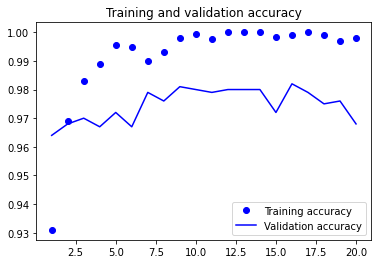

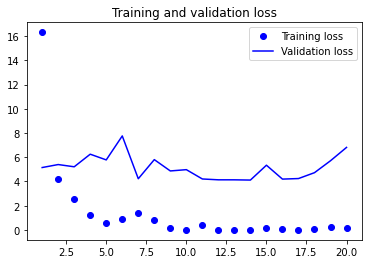

In [42]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [43]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet", # 모델을 초기화할 가중치 체크포인트 지정 
    include_top=False) #  densely connected classifier를 포함할 것인지 
conv_base.trainable = False 

**Printing the list of trainable weights before and after freezing**

In [44]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [45]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [46]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 24s 354ms/step - loss: 17.6693 - accuracy: 0.9030 - val_loss: 8.4817 - val_accuracy: 0.9420
Epoch 2/50
63/63 [==============================] - 22s 350ms/step - loss: 8.1231 - accuracy: 0.9390 - val_loss: 4.6969 - val_accuracy: 0.9650
Epoch 3/50
63/63 [==============================] - 22s 347ms/step - loss: 5.5423 - accuracy: 0.9555 - val_loss: 7.7643 - val_accuracy: 0.9540
Epoch 4/50
63/63 [==============================] - 22s 346ms/step - loss: 4.2193 - accuracy: 0.9655 - val_loss: 5.1083 - val_accuracy: 0.9680
Epoch 5/50
63/63 [==============================] - 22s 347ms/step - loss: 4.8171 - accuracy: 0.9620 - val_loss: 9.1441 - val_accuracy: 0.9610
Epoch 6/50
63/63 [==============================] - 22s 351ms/step - loss: 3.1160 - accuracy: 0.9695 - val_loss: 3.6200 - val_accuracy: 0.9730
Epoch 7/50
63/63 [==============================] - 22s 347ms/step - loss: 3.2107 - accuracy: 0.9695 - val_loss: 4.6373 - val_accuracy: 0.970

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

### Fine-tuning a pretrained model

In [ ]:
conv_base.summary()

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False
# 마지막 층에서 마지막에서 네번째 층까지 동결 

**Fine-tuning the model**

model base 상위 레이어 몇 개를 동결 해제하고 새로 추가된 부분을 학습한다

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5), # 낮은 학습률 사용 
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

## Summary